In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sksurv.preprocessing import OneHotEncoder as SurvOneHotEncoder
from sksurv.util import Surv

from sksurv.column import encode_categorical
from sksurv.column import standardize

pd.set_option('display.max_rows', 500)

### IDEAS
- remove NPKID: use only recipients with no previous transplants

In [ ]:
pickle_file = 'data/COX_DATA_FULL_LIVING.pkl'

with open(pickle_file, 'rb') as f:
    living = pickle.load(f)

living.drop(['DIAG_KI', 'COD_KI'], axis=1, inplace=True)

pickle_file = 'data/DATA_DECEASED.pkl'
with open(pickle_file, 'rb') as f:
    deceased = pickle.load(f)

print("living: ", living.shape)
print("deceased: ", deceased.shape)

# Figure 3.2

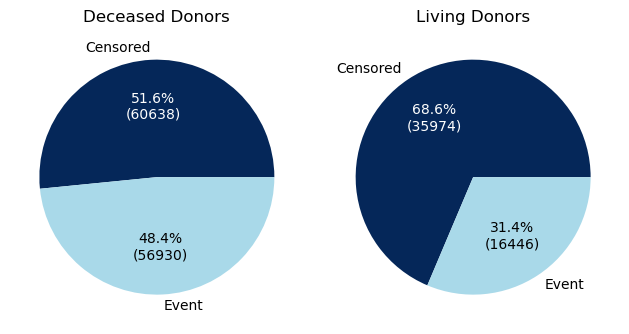

In [139]:
import matplotlib.pyplot as plt

colors = ["#052759", "#a9d9e9"]

# Custom function to format the percentage text
def custom_autopct(pct, allvalues):
    absolute = int(round(pct / 100.0 * sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot on the first subplot
deceased_counts = deceased["PSTATUS"].value_counts()
wedges1, texts1, autotexts1 = ax1.pie(
    deceased_counts,
    labels=["Censored", "Event"],
    autopct=lambda pct: custom_autopct(pct, deceased_counts),
    colors=colors,
)
ax1.set_title("Deceased Donors")

# Customize text properties for the first subplot
for i, autotext in enumerate(autotexts1):
    if i == 0:  # First category
        autotext.set_color(
            "white"
        )  # Adjust this to a color that contrasts well with your dark color
    else:  # Second category
        autotext.set_color("black")  # Assuming the second color is bright

# Plot on the second subplot
living_counts = living["PSTATUS"].value_counts()
wedges2, texts2, autotexts2 = ax2.pie(
    living_counts,
    labels=["Censored", "Event"],
    autopct=lambda pct: custom_autopct(pct, living_counts),
    colors=colors,
)
ax2.set_title("Living Donors")

# Customize text properties for the second subplot
for i, autotext in enumerate(autotexts2):
    if i == 0:  # First category
        autotext.set_color(
            "white"
        )  # Adjust this to a color that contrasts well with your dark color
    else:  # Second category
        autotext.set_color("black")  # Assuming the second color is bright

path = "../Thesis/Images/EDA/"
plt.savefig(path + "censoring-pie.pdf", bbox_inches='tight')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

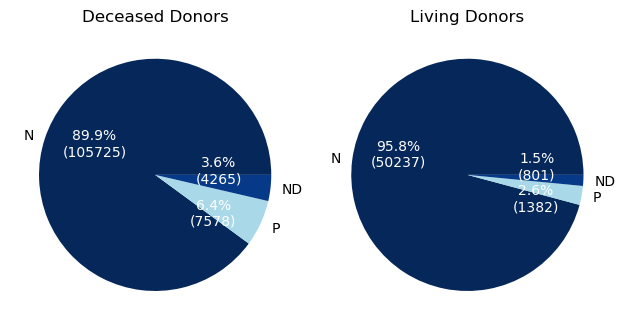

In [51]:
import matplotlib.pyplot as plt

colors = ["#052759", "#a9d9e9", "#063a89"]


# Custom function to format the percentage text
def custom_autopct(pct, allvalues):
    absolute = int(round(pct / 100.0 * sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot on the first subplot
deceased_counts = deceased["HCV_SEROSTATUS"].value_counts()
wedges1, texts1, autotexts1 = ax1.pie(
    deceased_counts,
    labels=deceased_counts.index,
    autopct=lambda pct: custom_autopct(pct, deceased_counts),
    colors=colors,
    pctdistance=0.55,
)
ax1.set_title("Deceased Donors")

# Customize text properties for the first subplot
for i, autotext in enumerate(autotexts1):
    if i in [0, 2]:  # First and third category
        autotext.set_color("white")
        autotext.set_position(
            (autotext.get_position()[0], autotext.get_position()[1] + 0.1)
        )  # Adjust this to a color that contrasts well with your dark color
    else:  # Second category
        autotext.set_color("white")  # Assuming the second color is bright
        autotext.set_position(
            (autotext.get_position()[0], autotext.get_position()[1] - 0.1)
        )

# Plot on the second subplot
living_counts = living["HCV_SEROSTATUS"].value_counts()
wedges2, texts2, autotexts2 = ax2.pie(
    living_counts,
    labels=living_counts.index,
    autopct=lambda pct: custom_autopct(pct, living_counts),
    colors=colors,
)
ax2.set_title("Living Donors")

# Customize text properties for the second subplot
for i, autotext in enumerate(autotexts2):
    if i in [0, 2]:  # First and third category
        autotext.set_color("white")
        autotext.set_position(
            (autotext.get_position()[0], autotext.get_position()[1] + 0.1)
        )  # Adjust this to a color that contrasts well with your dark color
    else:  # Second category
        autotext.set_color("white")  # Assuming the second color is bright
        autotext.set_position(
            (autotext.get_position()[0], autotext.get_position()[1] - 0.1)
        )

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [27]:
numeric_deceased = [
    "AGE",
    "BMI_CALC",
    "AGE_DON",
    "CREAT_TRR",
    "NPKID",
    "COLD_ISCH_KI",
]
categorical_deceased = [
    "ON_DIALYSIS",
    "PRE_TX_TXFUS",
    "GENDER",
    "ETHCAT",
    "DIAB",
    "HCV_SEROSTATUS",
    "DIABETES_DON",
]
categorical_living=[
                "ON_DIALYSIS", 
                "PRE_TX_TXFUS", 
                "GENDER",
                "ETHCAT", 
                'DIAB',
                'HCV_SEROSTATUS',  
                "ETHCAT_DON",
                "ABO_MAT", 
                'HBV_CORE', 
                'LIV_DON_TY',
]
numerical_living = [   
                "KI_CREAT_PREOP",
                "SERUM_CREAT",
                "NPKID", 
                "AGE", 
                "HGT_CM_CALC", 
                "BMI_DON_CALC",
                "AGE_DON"]

# Deceased Donors

In [51]:
desc = deceased[numeric_deceased].describe().T
table = desc.to_latex(caption="Descriptive Statistics for Numerical Variables in Deceased Donor Group", label="tab:desc_deceased", )
# print(table)

categorical_deceased = [
    "ON_DIALYSIS", ynu
    "PRE_TX_TXFUS",ynu
    "DIABETES_DON", ynu

    "GENDER", mf
    
    "HCV_SEROSTATUS", N/ND/P (filter NDs)
    "ETHCAT", # better in table
    "DIAB", # better in a table
]

1. ynu table
2. ethcat table
3. pie: gender, hcv, diab - done

In [128]:
# YN table
yn_table = {
    "Value": ["Yes", "No"],
    "ON_DIALYSIS": deceased['ON_DIALYSIS'].value_counts(),
    "PRE_TX_TXFUS": deceased['PRE_TX_TXFUS'].value_counts(),
    "DIABETES_DON": deceased['DIABETES_DON'].value_counts(),
}
yn_table = pd.DataFrame(yn_table)
yn_table = yn_table.to_latex(caption="Frequency of Yes/No Variables in Deceased Donor Group", label="tab:yn_deceased")
# print(yn_table)

In [54]:
import json

def get_deceased_cat_feature_values(feature:str):
    deceased_file = "../Application/models/coxnet_deceased_desc.json"

    with open(deceased_file, "r") as f:
        dec_data = json.load(f)
    ethcat_dict = [x for x in dec_data['features'] if x['name'] == feature][0]
    values = ethcat_dict['possible_values'].values()
    return values

def get_living_cat_feature_values(feature:str):
    living_file = "../Application/models/coxnet_living_desc.json"

    with open(living_file, "r") as f:
        liv_data = json.load(f)
    ethcat_dict = [x for x in liv_data['features'] if x['name'] == feature][0]
    values = ethcat_dict['possible_values'].values()
    return values

In [55]:
# ETHCAT table (now it a pie chart, so we can remove it)

ethcat_values = get_deceased_cat_feature_values("ETHCAT")

ethcat_table = {
    "Category": list(ethcat_values)[:-1],
    "ETHCAT": deceased['ETHCAT'].value_counts(),
}

ethcat_table = pd.DataFrame(ethcat_table)
# ethcat_table = ethcat_table.to_latex(caption="Frequency table for ETHCAT in Deceased Donor Group", label="tab:ethcat_deceased", index=False)
# print(ethcat_table)
# ethcat_table


/var/folders/c7/7_0s689j2m99wkwqx2b0skvm0000gn/T/ipykernel_73793/2037274846.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=list(ethcat_values)[:-1], loc="upper right", bbox_to_anchor=(2.1, 0.8))


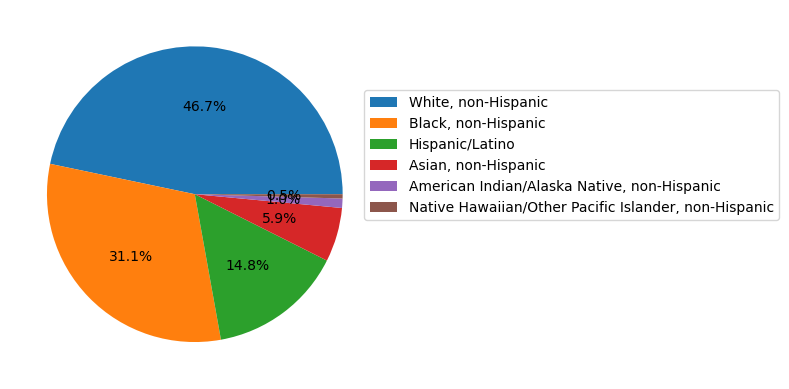

In [222]:
deceased_counts = deceased['ETHCAT'].value_counts()
patches, texts, autotexts = plt.pie(deceased_counts, autopct='%1.1f%%')
plt.legend(patches, labels=list(ethcat_values)[:-1], loc="upper right", bbox_to_anchor=(2.1, 0.8))
plt.show()

# Figure 3.7

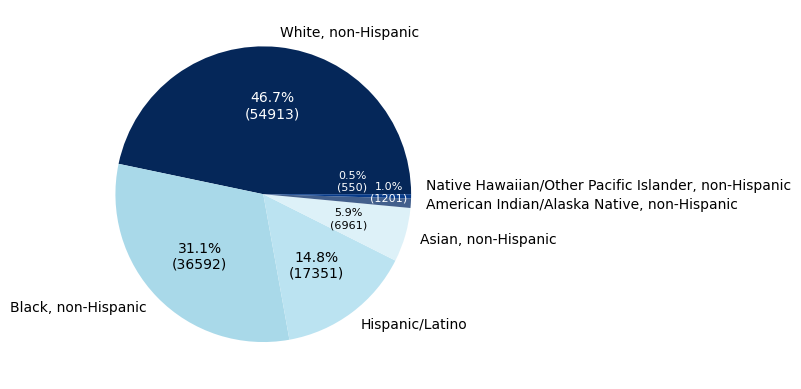

In [141]:
colors = [
    "#052759",
    "#a9d9e9",
    "#bbe3f1",
    "#ddf1f8",
    "#425f8c",
    "#063a89",
]
deceased_counts = deceased["ETHCAT"].value_counts()
patches, texts, autotexts = plt.pie(
    deceased_counts,
    labels=list(ethcat_values)[:-1],
    autopct=lambda pct: custom_autopct(pct, deceased_counts),
    colors=colors,
)
texts[-1]._y = 0.06

total_texts = len(autotexts)

for i, autotext in enumerate(autotexts):
    if i == 0:  # First category
        autotext.set_color("white")
    elif i == total_texts - 1:  # Last category
        autotext.set_color("white")
        autotext.set_fontsize(8)
        autotext.set_position(
            (autotext.get_position()[0], autotext.get_position()[1] + 0.1)
        )
    elif i == total_texts - 2:  # Second to last category
        autotext.set_color("white")
        autotext.set_fontsize(8)
        autotext.set_position(
            (autotext.get_position()[0] + 0.25, autotext.get_position()[1] + 0.05)
        )
    elif i == total_texts - 3:
        autotext.set_fontsize(8)
    elif i == total_texts - 4:
        autotext.set_fontsize(10)
    else:  # Other categories
        autotext.set_color("black")  # Assuming the default color for other categories
        if i == total_texts - 2:  # Second to last category
            autotext.set_position(
                (autotext.get_position()[0], autotext.get_position()[1] - 0.2)
            )

path = "../Thesis/Images/EDA/"
plt.savefig(path + "ethncat-deceased-pie.pdf", bbox_inches='tight')

plt.show()

THE SAME FOR THE LIVING? (3.7) no, in the living we have also ethncat_don. the table is preferrable there. Here it is better to use the pie chart.

# 3.8

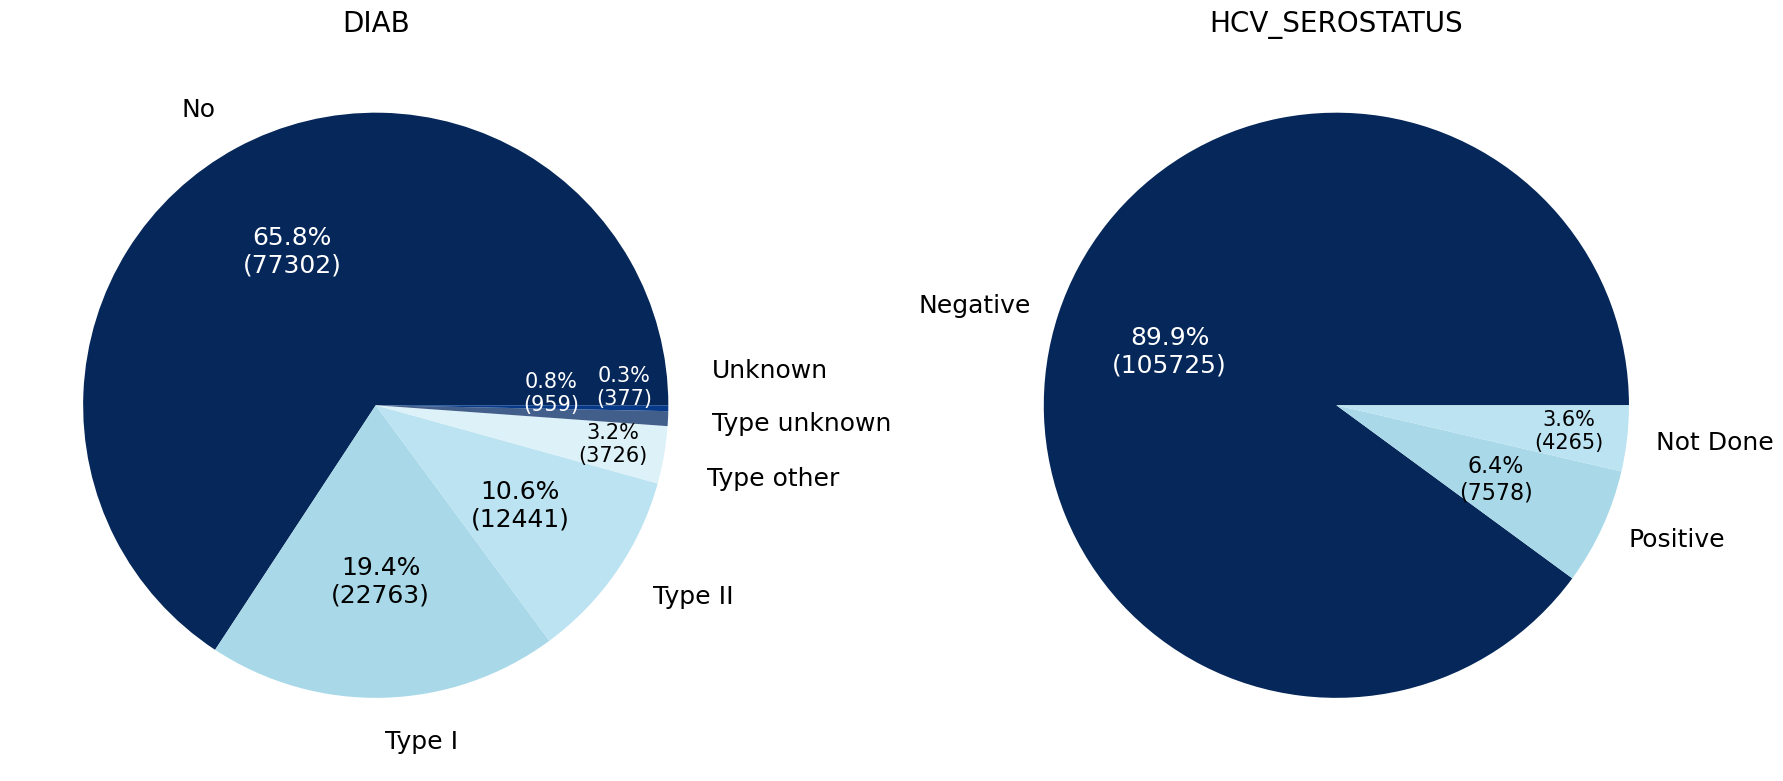

In [221]:
import matplotlib.pyplot as plt

fontsize = 18
title_fontsize = 20


fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(18, 9))
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 9))


# Plot on the  onst sufirst
# gender = deceased["GENDER"].value_counts()
# wedges1, texts1, autotexts1 = ax1.pie(
#     gender,
#     labels=get_deceased_cat_feature_values("GENDER"),
#     autopct=lambda pct: custom_autopct(pct, gender),
#     textprops={"fontsize": fontsize},
#     colors=colors,
# )
# ax1.set_title("GENDER", fontsize=title_fontsize)

# Plot on the se# Plot on the second subplot
# cond subplot
diab = deceased["DIAB"].value_counts()
patches2, texts2, autotexts2 = ax2.pie(
    diab,
    labels=get_deceased_cat_feature_values("DIAB"),
    autopct=lambda pct: custom_autopct(pct, diab),
    labeldistance=1.15,
    textprops={"fontsize": fontsize},
    colors=colors,
)
texts2[-1]._y = 0.12
texts2[-2]._y = -0.06
texts2[-3]._y = -0.25
ax2.set_title("DIAB", fontsize=title_fontsize)

hcv = deceased["HCV_SEROSTATUS"].value_counts()
hcv_labels = list(get_deceased_cat_feature_values("HCV_SEROSTATUS"))[:-1]
patches3, texts3, autotexts3 = ax3.pie(
    hcv,
    labels=hcv_labels,
    autopct=lambda pct: custom_autopct(pct, hcv),
    textprops={"fontsize": fontsize},
    colors=colors,
)
ax3.set_title("HCV_SEROSTATUS", fontsize=title_fontsize)

# for i, autotext in enumerate(autotexts1):
#     if i == 0:  # First category
#         autotext.set_color("white")
for i, autotext in enumerate(autotexts2):
    if i == 0:  # First category
        autotext.set_color("white")
    elif i == len(autotexts2) - 1:  # Last category
        autotext.set_color("white")
        autotext.set_fontsize(15)
        autotext.set_position(
            (autotext.get_position()[0]+0.25, autotext.get_position()[1]+0.07)
        )
    elif i == len(autotexts2) - 2:  # Last category
        autotext.set_color("white")
        autotext.set_fontsize(15)
        autotext.set_position(
            (autotext.get_position()[0], autotext.get_position()[1]+0.07)
        )
    elif i == len(autotexts2) - 3:  # Last category
        # autotext.set_color("white")
        autotext.set_fontsize(15)
        autotext.set_position(
            (autotext.get_position()[0]+0.22, autotext.get_position()[1]-0.03)
        )
for i, autotext in enumerate(autotexts3):
    if i == 0:  # First category
        autotext.set_color("white")
    elif i == 1:
    # else:
        autotext.set_fontsize(16)
        (autotext.get_position()[0]+0.2, autotext.get_position()[1]-0.01)
    elif i == len(autotexts3) - 1:  # Last category
        # autotext.set_color("white")
        autotext.set_fontsize(15)
        autotext.set_position(
            (autotext.get_position()[0]+0.2, autotext.get_position()[1]-0.02)
        )
    elif i == len(autotexts3) - 2:  # Last category
        # autotext.set_color("white")
        autotext.set_fontsize(15)
        autotext.set_position(
            (autotext.get_position()[0]+0.2, autotext.get_position()[1]-0.02)
        )

path = "../Thesis/Images/EDA/"
plt.savefig(path + "diab-hcv-deceased-pie.pdf", bbox_inches='tight')

plt.tight_layout()
plt.show()

In [52]:
# deceased['DIAB'].value_counts().plot(kind="pie", autopct='%1.1f%%', textprops={'fontsize': 10}, figsize=(12, 12))

# Living Donors

categorical_living=["PRE_TX_TXFUS", # ynu
                "ON_DIALYSIS",  #ynu

                "GENDER", #mf
                
                "ABO_MAT",  # unique values: maybe pie?

                "ETHCAT", # table 
                "ETHCAT_DON", # same table

                'HBV_CORE', # N/ND/P (filter NDs)
                'HCV_SEROSTATUS', # N/ND/P (filter NDs)

                'DIAB', # better in a table
                
                'LIV_DON_TY', # better in a table

## Living tables
1. ynu table - yes
2. Ethncat table - yes
3. N/P table

pie: gender, abo_mat, Diab, liv_don_type, 
4. Diab table, pie?
5. Liv don type table pie?
6. ABO mat - pie?


In [52]:
desc_living = living[numerical_living].astype("float").describe().T
desc_living = desc_living.round(2)
table_living = desc_living.to_latex(caption="Descriptive Statistics for Numerical Variables in Living Donor Group", label="tab:desc_living", )
# print(table_living)

In [276]:
# ETHCAT table

ethcat_values = get_living_cat_feature_values("ETHCAT")
# ethcat_don_values = get_living_cat_feature_values("ETHCAT_DON")

ethcat_table = {
    "Category": list(ethcat_values),
    "ETHCAT": living['ETHCAT'].value_counts().values, # better % of total
    "ETHCAT_DON": living['ETHCAT_DON'].value_counts().values, # better % of total
}

ethcat_table = pd.DataFrame(ethcat_table)
ethcat_table = ethcat_table.to_latex(caption="Frequency table for ETHCAT in Deceased Donor Group", label="tab:ethcat_deceased", index=False)
# print(ethcat_table)

In [299]:
# YNU table
yn_table = {
    "Value": ["Yes", "No"],
    "ON_DIALYSIS": living['ON_DIALYSIS'].value_counts(),
    "PRE_TX_TXFUS": living['PRE_TX_TXFUS'].value_counts(),
    # "DIABETES_DON": living['DIABETES_DON'].value_counts(),
}
yn_table = pd.DataFrame(yn_table)
yn_table = yn_table.to_latex(caption="Frequency of Yes/No/Unknown Variables in Living Donor Group", label="tab:yn_living")
# print(yn_table)

In [298]:
# N/P table
np_table = {
    "Value": ["N", "P", "ND"],
    "HCV_SEROSTATUS": living['HCV_SEROSTATUS'].value_counts(),
    "HBV_CORE": living['HBV_CORE'].value_counts(),
    # "LIV_DON_TY": living['LIV_DON_TY'].value_counts(),
}
np_table = pd.DataFrame(np_table)
np_table = np_table.to_latex(caption="Frequency of N/P Variables in Living Donor Group", label="tab:np_living")
# print(np_table)

# Figure 3.9

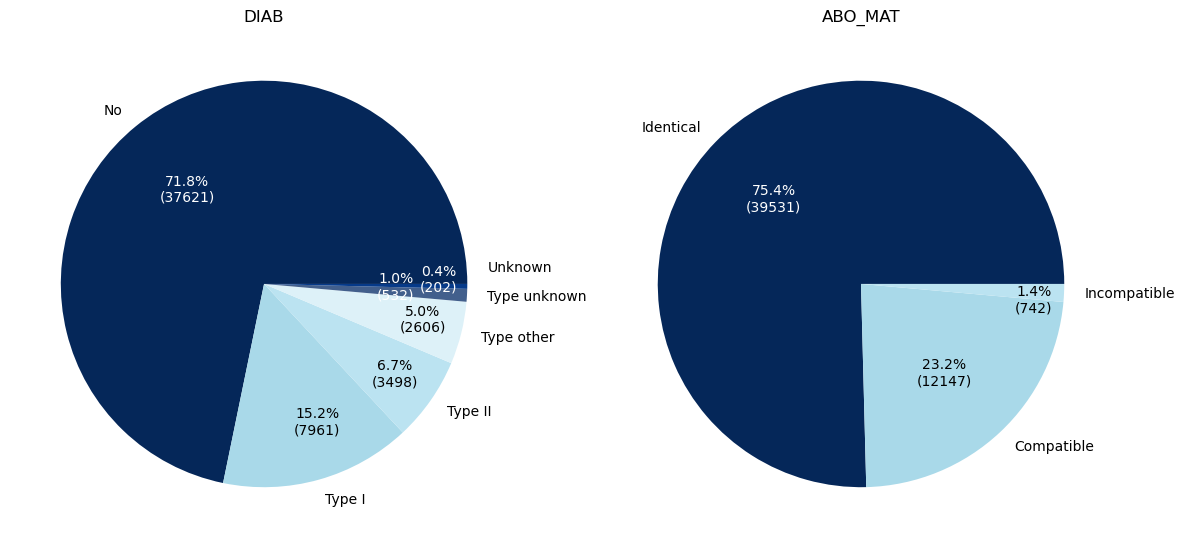

In [258]:
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 6))
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 6))


# # Plot on the first subplot
# deceased_counts = living['GENDER'].value_counts()
# ax1.pie(deceased_counts, labels=get_living_cat_feature_values('GENDER'), autopct='%1.1f%%', colors=colors)
# ax1.set_title('GENDER')

# Plot on the second subplot
diab = living["DIAB"].value_counts()
patches, texts, autotexts1 = ax2.pie(
    diab,
    labels=get_living_cat_feature_values("DIAB"),
    autopct=lambda pct: custom_autopct(pct, diab),
    colors=colors,
)
texts[-1]._y = 0.08
ax2.set_title("DIAB")

for i, autotext in enumerate(autotexts1):
    if i == 0:  # First category
        autotext.set_color("white")
    if i == len(autotexts1) - 1:  # Last category
        # autotext.set_fontsize(16)
        autotext.set_color("white")
        autotext.set_position(
            (autotext.get_position()[0]+0.26, autotext.get_position()[1]+0.03)
        )
    if i == len(autotexts1) - 2:  # Last category
        # autotext.set_fontsize(16)
        autotext.set_color("white")
        autotext.set_position(
            (autotext.get_position()[0]+0.05, autotext.get_position()[1]+0.02)
        )
    if i == len(autotexts1) - 3:  # Last category
        # autotext.set_fontsize(16)
        # autotext.set_color("white")
        autotext.set_position(
            (autotext.get_position()[0]+0.2, autotext.get_position()[1]-0.029)
        )
    if i == len(autotexts1) - 4:  # Last category
        # autotext.set_fontsize(16)
        # autotext.set_color("white")
        autotext.set_position(
            (autotext.get_position()[0]+0.15, autotext.get_position()[1]-0.1)
        )
    if i == len(autotexts1) - 5:  # Last category
        # autotext.set_fontsize(16)
        # autotext.set_color("white")
        autotext.set_position(
            (autotext.get_position()[0]+0.1, autotext.get_position()[1]-0.1)
        )

abo = living["ABO_MAT"].value_counts()
patches, texts, autotexts2 = ax3.pie(
    abo,
    labels=get_living_cat_feature_values("ABO_MAT"),
    autopct=lambda pct: custom_autopct(pct, abo),
    colors=colors,
)
ax3.set_title("ABO_MAT")

for i, autotext in enumerate(autotexts2):
    if i == 0:  # First category
        autotext.set_color("white")
    elif i == 2:
        autotext.set_color("black")
        autotext.set_position(
            (autotext.get_position()[0]+0.25, autotext.get_position()[1]-0.05)
        )

path = "../Thesis/Images/EDA/"
plt.savefig(path + "diab-abo-living-pie.pdf", bbox_inches='tight')

plt.tight_layout()
plt.show()

In [329]:
def get_living_donor_ty_values():
    living_file = "../Application/models/coxnet_living_desc.json"
    val_counts = living['LIV_DON_TY'].value_counts()

    with open(living_file, "r") as f:
        liv_data = json.load(f)
    ethcat_dict = [x for x in liv_data['features'] if x['name'] == "LIV_DON_TY"][0]
    possible_values = ethcat_dict['possible_values']
    # print(ethcat_dict['possible_values'])
    values = [possible_values[poss_val] for poss_val in possible_values if poss_val in val_counts.index]
    # print(values)
    return values

# 3.10

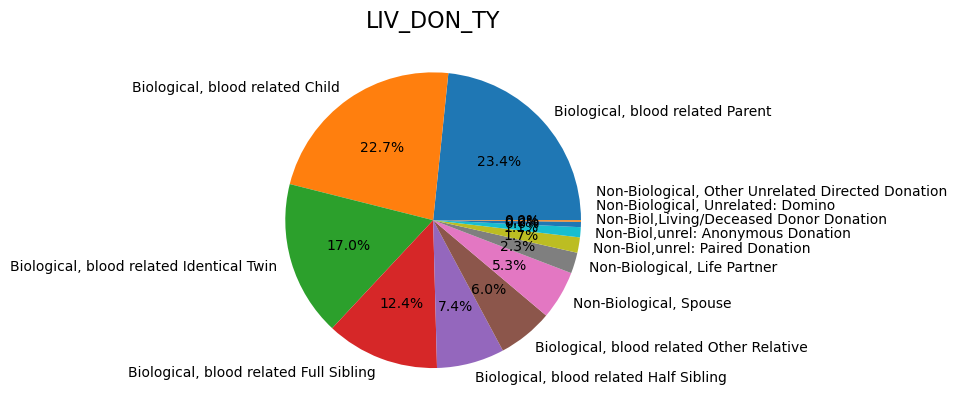

In [330]:
liv_don_ty = living['LIV_DON_TY'].value_counts()
labels = get_living_donor_ty_values()
patches, texts, autotexts = plt.pie(liv_don_ty, labels=labels, autopct='%1.1f%%')
texts[-1]._y = 0.2
texts[-2]._y = 0.1
texts[-3]._y = 0.01
plt.title("LIV_DON_TY", fontsize=16)
plt.show()

In [300]:
living['LIV_DON_TY'].value_counts()

4.0      12243
999.0    11907
2.0       8896
7.0       6488
6.0       3879
1.0       3162
9.0       2793
10.0      1197
11.0       880
5.0        579
8.0        307
3.0         88
12.0         1
Name: LIV_DON_TY, dtype: int64

In [296]:
len(get_living_cat_feature_values('LIV_DON_TY'))

16

# Generate latex feature table

In [120]:
import json

categorical = categorical_deceased + categorical_living
numeric = numeric_deceased + numerical_living

def get_descriptions():
    deceased_file = "../Application/models/coxnet_deceased_desc.json"
    living_file = "../Application/models/coxnet_living_desc.json"
    file_paths = [deceased_file, living_file]

    for file_path in file_paths:
            with open(file_path, "r") as f:
                desc_data = json.load(f)
                for feature in desc_data["features"]:
                    name_desc[feature["name"]] = feature["description"]
    return name_desc

name_desc = get_descriptions()

feature_table  = {
    "Feature": categorical + numeric,
    "Description": [name_desc[feature] for feature in categorical + numeric],
    "Type": ["Categorical"] * len(categorical) + ["Numerical"] * len(numeric),
}

feature_table = pd.DataFrame(feature_table)
feature_table = feature_table.to_latex(caption="Feature Table", label="tab:feature_table", index=False)
print(feature_table)

\begin{table}
\centering
\caption{Feature Table}
\label{tab:feature_table}
\begin{tabular}{lll}
\toprule
        Feature &                                        Description &         Type \\
\midrule
    ON\_DIALYSIS &    The recipient's pre-transplant dialysis status. &  Categorical \\
   PRE\_TX\_TXFUS &  The recipient's history of pre-transplant bloo... &  Categorical \\
         GENDER &                                   Recipient gender &  Categorical \\
         ETHCAT &                                Recipient ethnicity &  Categorical \\
   DIABETES\_DON &  The presence or absence of diabetes in the donor. &  Categorical \\
           DIAB &          Whether or not the recipient has diabetes &  Categorical \\
 HCV\_SEROSTATUS &       Whether or not the recipient has Hepatitis C &  Categorical \\
   PRE\_TX\_TXFUS &  The recipient's history of pre-transplant bloo... &  Categorical \\
         GENDER &                                   Recipient gender &  Categorical \\
    ON\_D